In [1]:
import numpy as np
import matplotlib.pyplot as plt

def image_contour(img):
  neighbour_map = [7, 7, 1, 1, 3, 3, 5, 5]
  
  img_pad = np.pad(img, 1, mode='constant')
  num_rows, num_cols = img.shape
  
  k = 0
  row = 0
  col = 0
  while img_pad[row, col] == 0:
    k += 1
    row = k // num_cols
    col = k - row * num_cols
    
  curr_point = (row, col)
  contour = [curr_point]
  starting_index = 2
  while True:
    next_point, last_index = get_next_point(img_pad, 
                                           curr_point, 
                                           starting_index)
    
    starting_index = neighbour_map[last_index]
    if len(contour) > 1: 
      if next_point == contour[1] and contour[-1] == contour[0]:
        break
    contour.append(next_point)
    curr_point = next_point
    
  for idx, point in enumerate(contour):
    contour[idx] = (point[0]-1, point[1]-1)

  return contour

In [3]:
def get_next_point(img, curr_point, starting_index):
  nei_list = [(-1, 0), (-1, 1), (0, 1), (1, 1), #nei = neighbour
              (1, 0), (1, -1), (0, -1), (-1,-1)]
  
  curr_index = starting_index
  nei_value = 0
  while nei_value == 0:
    nei_shift = nei_list[curr_index]
    nei_row = curr_point[0] + nei_shift[0]
    nei_col = curr_point[1] + nei_shift[1]
    nei_value = img[nei_row, nei_col]
    
    if nei_value == 1:
      return (nei_row, nei_col), curr_index
    
    else: 
      curr_index = (curr_index + 1) % 8

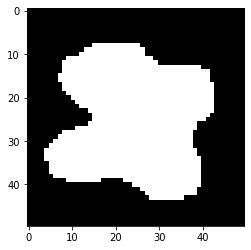

In [7]:
img = plt.imread('Imgs/blob.tiff')
img = img > 0
plt.imshow(img, 'gray')

In [9]:
cont = image_contour(img)
cont = np.array(cont)

In [13]:
''' plt.plot(cont[:, 0])
plt.plot(cont[:, 1]) '''

' plt.plot(cont[:, 0])\nplt.plot(cont[:, 1]) '

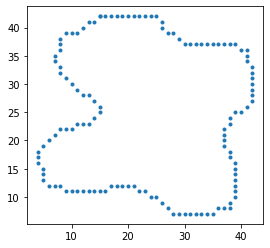

In [17]:
plt.subplot(111, aspect='equal')
plt.plot(cont[:, 1], img.shape[0] - cont[:, 0], 'o', ms=3)